# Shared Vocab and String Store

spaCy stores all shared data in a vocabulary, the Vocab.

This includes words, but also the labels schemes for tags and entities.

To save memory, all strings are encoded to hash IDs. If a word occurs more than once, we don't need to save it every time.

Instead, spaCy uses a hash function to generate an ID and stores the string only once in the string store. The string store is available as nlp.vocab.strings.

It's a lookup table that works in both directions. You can look up a string and get its hash, and look up a hash to get its string value. Internally, spaCy only communicates in hash IDs.

Hash IDs can't be reversed, though. If a word is not in the vocabulary, there's no way to get its string. That's why we always need to pass around the shared vocab.

To get the hash for a string, we can look it up in nlp.vocab.strings.

To get the string representation of a hash, we can look up the hash.

A Doc object also exposes its vocab and strings.

In [1]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [2]:
doc = nlp("I love coffee")
print("hash value:", nlp.vocab.strings["coffee"])
print("string value:", nlp.vocab.strings[3197928453018144401])

hash value: 3197928453018144401
string value: coffee


In [3]:
doc = nlp("I love coffee")
print("hash value:", doc.vocab.strings["coffee"])

hash value: 3197928453018144401


# Data Structures
Lexemes are context-independent entries in the vocabulary.

You can get a lexeme by looking up a string or a hash ID in the vocab.

Lexemes expose attributes, just like tokens.

They hold context-independent information about a word, like the text, or whether the word consists of alphabetic characters.

Lexemes don't have part-of-speech tags, dependencies or entity labels. Those depend on the context.

In [5]:
doc = nlp("I love coffee")
lexeme = nlp.vocab["coffee"]

# Print the lexical attributes
print(lexeme.text, lexeme.orth, lexeme.is_alpha)

coffee 3197928453018144401 True


# Here's an example.

The Doc contains words in context – in this case, the tokens "I", "love" and "coffee" with their part-of-speech tags and dependencies.

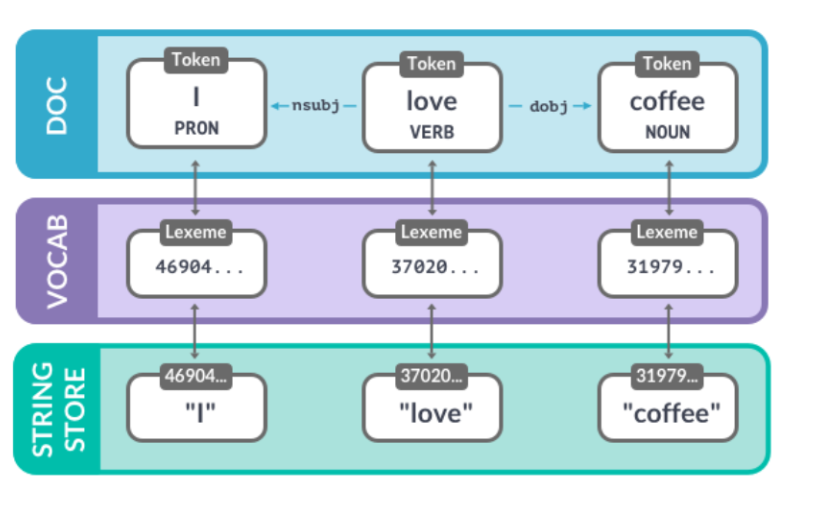

Each token refers to a lexeme, which knows the word's hash ID. To get the string representation of the word, spaCy looks up the hash in the string store.

In [7]:
from spacy.lang.en import English

nlp = English()
doc = nlp("I have a cat")

# Look up the hash for the word "cat"
cat_hash = nlp.vocab.strings["cat"]
print(cat_hash)

# Look up the cat_hash to get the string
cat_string = nlp.vocab.strings[cat_hash]
print(cat_string)

5439657043933447811
cat


In [8]:
doc = nlp("David Bowie is a PERSON")


# Look up the hash for the string label "PERSON"
person_hash = nlp.vocab.strings["PERSON"]
print(person_hash)

# Look up the person_hash to get the string
person_string = nlp.vocab.strings[person_hash]
print(person_string)

380
PERSON


### Why does this code throw an error?

##### The string "Bowie" isn’t in the German vocab, so the hash can’t be resolved in the string store.

In [9]:
from spacy.lang.en import English
from spacy.lang.de import German

# Create an English and German nlp object
nlp = English()
nlp_de = German()

# Get the ID for the string 'Bowie'
bowie_id = nlp.vocab.strings["Bowie"]
print(bowie_id)

# Look up the ID for "Bowie" in the vocab
print(nlp_de.vocab.strings[bowie_id])

2644858412616767388


KeyError: "[E018] Can't retrieve string for hash '2644858412616767388'. This usually refers to an issue with the `Vocab` or `StringStore`."

# The Doc Object

The Doc is one of the central data structures in spaCy. It's created automatically when you process a text with the nlp object. But you can also instantiate the class manually.

After creating the nlp object, we can import the Doc class from spacy.tokens.

Here we're creating a doc from three words. The spaces are a list of boolean values indicating whether the word is followed by a space. Every token includes that information – even the last one!

The Doc class takes three arguments: the shared vocab, the words and the spaces.

In [11]:
# Create an nlp object
from spacy.lang.en import English
nlp = English()

# Import the Doc class
from spacy.tokens import Doc

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc)

Hello world!


# Span Object

A Span is a slice of a doc consisting of one or more tokens. The Span takes at least three arguments: the doc it refers to, and the start and end index of the span. Remember that the end index is exclusive!

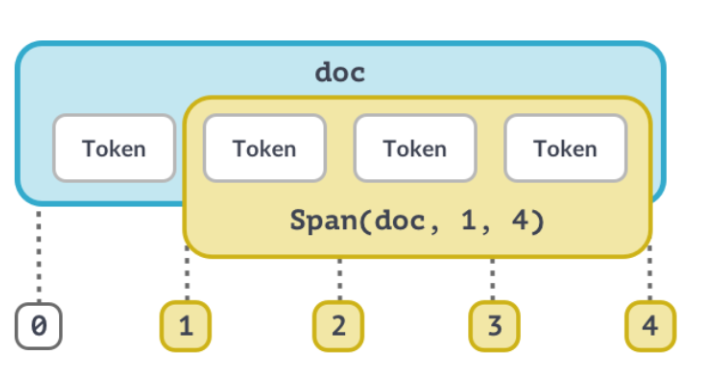

To create a Span manually, we can also import the class from spacy.tokens. We can then instantiate it with the doc and the span's start and end index, and an optional label argument.

The doc.ents are writable, so we can add entities manually by overwriting it with a list of spans.

In [13]:
# Import the Doc and Span classes
from spacy.tokens import Doc, Span

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

# Create a span manually
span = Span(doc, 0, 2)

# Create a span with a label
span_with_label = Span(doc, 0, 2, label="GREETING")

# Add span to the doc.ents
doc.ents = [span_with_label]

print(span)
print(doc.ents)

Hello world
(Hello world,)


A few tips and tricks before we get started:

The Doc and Span are very powerful and optimized for performance. They give you access to all references and relationships of the words and sentences.

If your application needs to output strings, make sure to convert the doc as late as possible. If you do it too early, you'll lose all relationships between the tokens.

To keep things consistent, try to use built-in token attributes wherever possible. For example, token.i for the token index.

Also, don't forget to always pass in the shared vocab!

In [14]:
from spacy.lang.en import English

nlp = English()

# Import the Doc class
from spacy.tokens import Doc

# Desired text: "spaCy is cool!"
words = ["spaCy", "is", "cool", "!"]
spaces = [True, True, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

spaCy is cool!


In [15]:
from spacy.lang.en import English

nlp = English()

# Import the Doc class
from spacy.tokens import Doc

# Desired text: "Go, get started!"
words = ["Go", ",", "get", "started", "!"]
spaces = [False, True, True, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

Go, get started!


In [16]:
from spacy.lang.en import English

nlp = English()

# Import the Doc class
from spacy.tokens import Doc

# Desired text: "Oh, really?!"
words = ["Oh", ",", "really", "?", "!"]
spaces = [False, True, False, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

Oh, really?!


In [17]:
from spacy.lang.en import English

nlp = English()

# Import the Doc and Span classes
from spacy.tokens import Doc, Span

words = ["I", "like", "David", "Bowie"]
spaces = [True, True, True, False]

# Create a doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

# Create a span for "David Bowie" from the doc and assign it the label "PERSON"
span = Span(doc, 2, 4, label="PERSON")
print(span.text, span.label_)

# Add the span to the doc's entities
doc.ents = [span]

# Print entities' text and labels
print([(ent.text, ent.label_) for ent in doc.ents])

I like David Bowie
David Bowie PERSON
[('David Bowie', 'PERSON')]


# Bad Code Example

The code in this example is trying to analyze a text and collect all proper nouns that are followed by a verb.

It only uses lists of strings instead of native token attributes. This is often less efficient, and can't express complex relationships.

In [20]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Berlin is a nice city")

# Get all tokens and part-of-speech tags
token_texts = [token.text for token in doc]
pos_tags = [token.pos_ for token in doc]

for index, pos in enumerate(pos_tags):
    # Check if the current token is a proper noun
    if pos == "PROPN":
        # Check if the next token is a verb
        if pos_tags[index + 1] == "VERB":
            result = token_texts[index]
            print("Found proper noun before a verb:", result)

Rewrite the code to use the native token attributes instead of lists of token_texts and pos_tags.
Loop over each token in the doc and check the token.pos_ attribute.
Use doc[token.i + 1] to check for the next token and its .pos_ attribute.
If a proper noun before a verb is found, print its token.text.

In [19]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Berlin is a nice city")

# Iterate over the tokens
for token in doc:
    # Check if the current token is a proper noun
    if token.pos_ == "PROPN":
        # Check if the next token is a verb
        if doc[token.i + 1].pos_ == "VERB":
            print("Found proper noun before a verb:", token.text)

# Word Vectors and Semantic Similarity

spaCy can compare two objects and predict how similar they are – for example, documents, spans or single tokens.

The Doc, Token and Span objects have a .similarity method that takes another object and returns a floating point number between 0 and 1, indicating how similar they are.

One thing that's very important: In order to use similarity, you need a larger spaCy model that has word vectors included.

For example, the medium or large English model – but not the small one. So if you want to use vectors, always go with a model that ends in "md" or "lg". You can find more details on this in the models documentation.

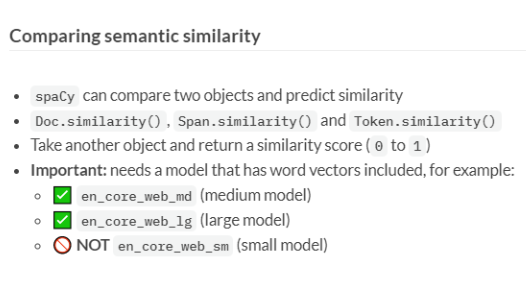

In [22]:
# Load a larger model with vectors
nlp = spacy.load("en_core_web_sm")

# Compare two documents
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")
print(doc1.similarity(doc2))

0.8018373287411041


C:\Users\user\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


In [23]:
doc = nlp("I like pizza and pasta")
token1 = doc[2]
token2 = doc[4]
print(token1.similarity(token2))

0.32624283


C:\Users\user\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


In [24]:
# Compare a document with a token
doc = nlp("I like pizza")
token = nlp("soap")[0]

print(doc.similarity(token))

0.28162675424923095


C:\Users\user\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


In [25]:
# Compare a span with a document
span = nlp("I like pizza and pasta")[2:5]
doc = nlp("McDonalds sells burgers")

print(span.similarity(doc))

0.294720206859215


C:\Users\user\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Span.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


# But how does spaCy do this under the hood?

Similarity is determined using word vectors, multi-dimensional representations of meanings of words.

You might have heard of Word2Vec, which is an algorithm that's often used to train word vectors from raw text.

Vectors can be added to spaCy's statistical models.

By default, the similarity returned by spaCy is the cosine similarity between two vectors – but this can be adjusted if necessary.

Vectors for objects consisting of several tokens, like the Doc and Span, default to the average of their token vectors.

That's also why you usually get more value out of shorter phrases with fewer irrelevant words.

To give you an idea of what those vectors look like, here's an example.

First, we load the medium model again, which ships with word vectors.

Next, we can process a text and look up a token's vector using the .vector attribute.

The result is a 300-dimensional vector of the word "banana".

In [26]:
doc = nlp("I have a banana")
# Access the vector via the token.vector attribute
print(doc[3].vector)

[ 0.9383564  -2.9524927   1.1866798   0.49744225 -0.11475766  0.804008
  0.4672468  -1.1062207   2.9193573   1.800931   -0.31358248  1.1920271
 -1.2406584  -2.3237133   2.099902   -0.66673994 -0.96991694  0.8316833
  0.10666084 -0.42245626  1.6402073   0.95437694  1.2855074  -2.038612
 -0.7317371  -0.17545497  0.14752543  1.327169    3.2502053  -3.9332502
  1.7409098  -0.73711336  1.4852796  -2.8246899  -1.8938334  -1.2638527
  5.298433   -1.2850044  -2.7470415  -1.5607052   5.181785    2.242096
 -2.1922808  -5.310454    1.0295098   1.484088   -1.5894104  -0.14745024
  1.7829046   1.8879583   4.152973   -3.1493165  -0.18937713  2.09369
 -2.1269834   0.63290507  2.6979058   1.800016   -2.3953576   2.54901
  1.0445759  -1.3137031   2.4631662  -0.07756937 -1.129545    0.1169464
  1.3869805   0.53586185 -2.242661    2.8641388  -3.8719153  -0.6409143
  0.6971829   4.484493   -1.6210997   2.494869    0.7218447  -3.3112261
 -0.2163549  -2.5339773  -1.1702836  -0.9627162  -3.7210062   1.559916

# Similarity depends on the application context

Predicting similarity can be useful for many types of applications. For example, to recommend a user similar texts based on the ones they have read. It can also be helpful to flag duplicate content, like posts on an online platform.

However, it's important to keep in mind that there's no objective definition of what's similar and what isn't. It always depends on the context and what your application needs to do.

Here's an example: spaCy's default word vectors assign a very high similarity score to "I like cats" and "I hate cats". This makes sense, because both texts express sentiment about cats. But in a different application context, you might want to consider the phrases as very dissimilar, because they talk about opposite sentiments.

In [27]:
doc1 = nlp("I like cats")
doc2 = nlp("I hate cats")

print(doc1.similarity(doc2))

0.849750871465223


C:\Users\user\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


# Combining Models and Rules

Statistical models are useful if your application needs to be able to generalize based on a few examples.

For instance, detecting product or person names usually benefits from a statistical model. Instead of providing a list of all person names ever, your application will be able to predict whether a span of tokens is a person name. Similarly, you can predict dependency labels to find subject/object relationships.

To do this, you would use spaCy's entity recognizer, dependency parser or part-of-speech tagger.

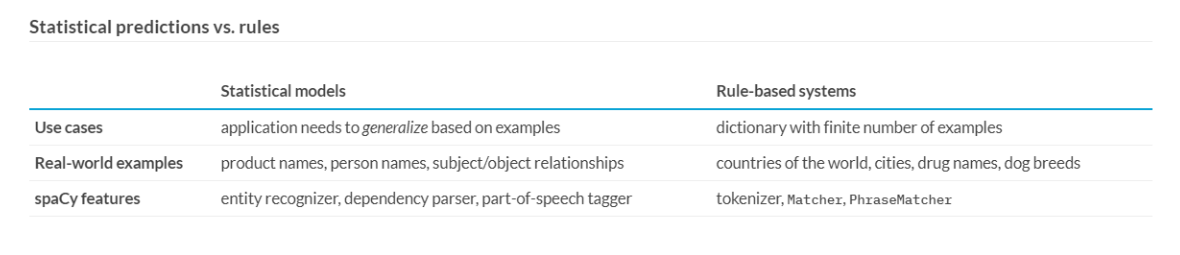


# Example of Rule Based Matching

In the last chapter, you learned how to use spaCy's rule-based matcher to find complex patterns in your texts. Here's a quick recap.

The matcher is initialized with the shared vocabulary – usually nlp.vocab.

Patterns are lists of dictionaries, and each dictionary describes one token and its attributes. Patterns can be added to the matcher using the matcher.add method.

Operators let you specify how often to match a token. For example, "+" will match one or more times.

Calling the matcher on a doc object will return a list of the matches. Each match is a tuple consisting of an ID, and the start and end token index in the document.

In [28]:
# Initialize with the shared vocab
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

# Patterns are lists of dictionaries describing the tokens
pattern = [{"LEMMA": "love", "POS": "VERB"}, {"LOWER": "cats"}]
matcher.add("LOVE_CATS", None, pattern)

# Operators can specify how often a token should be matched
pattern = [{"TEXT": "very", "OP": "+"}, {"TEXT": "happy"}]
matcher.add("VERY_HAPPY", None, pattern)

# Calling matcher on doc returns list of (match_id, start, end) tuples
doc = nlp("I love cats and I'm very very happy")
matches = matcher(doc)

print(matches)

[(9137535031263442622, 1, 3), (2447047934687575526, 7, 9), (2447047934687575526, 6, 9)]


# Here's an example of a matcher rule for "golden retriever".

If we iterate over the matches returned by the matcher, we can get the match ID and the start and end index of the matched span. We can then find out more about it. Span objects give us access to the original document and all other token attributes and linguistic features predicted by the model.

For example, we can get the span's root token. If the span consists of more than one token, this will be the token that decides the category of the phrase. For example, the root of "Golden Retriever" is "Retriever". We can also find the head token of the root. This is the syntactic "parent" that governs the phrase – in this case, the verb "have".

Finally, we can look at the previous token and its attributes. In this case, it's a determiner, the article "a".

In [29]:
matcher = Matcher(nlp.vocab)
matcher.add("DOG", None, [{"LOWER": "golden"}, {"LOWER": "retriever"}])
doc = nlp("I have a Golden Retriever")

for match_id, start, end in matcher(doc):
    span = doc[start:end]
    print("Matched span:", span.text)
    # Get the span's root token and root head token
    print("Root token:", span.root.text)
    print("Root head token:", span.root.head.text)
    # Get the previous token and its POS tag
    print("Previous token:", doc[start - 1].text, doc[start - 1].pos_)

Matched span: Golden Retriever
Root token: Retriever
Root head token: have
Previous token: a DET


# Phrase Matcher

The phrase matcher is another helpful tool to find sequences of words in your data.

It performs a keyword search on the document, but instead of only finding strings, it gives you direct access to the tokens in context.

It takes Doc objects as patterns.

It's also really fast.

This makes it very useful for matching large dictionaries and word lists on large volumes of text.



In [30]:
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

pattern = nlp("Golden Retriever")
matcher.add("DOG", None, pattern)
doc = nlp("I have a Golden Retriever")

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Get the matched span
    span = doc[start:end]
    print("Matched span:", span.text)

Matched span: Golden Retriever


# Debugging Patterns

Both patterns in this exercise contain mistakes and won’t match as expected. Can you fix them? If you get stuck, try printing the tokens in the doc to see how the text will be split and adjust the pattern so that each dictionary represents one token.

Edit pattern1 so that it correctly matches all case-insensitive mentions of "Amazon" plus a title-cased proper noun.

Edit pattern2 so that it correctly matches all case-insensitive mentions of "ad-free", plus the following noun.

In [31]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
doc = nlp(
    "Twitch Prime, the perks program for Amazon Prime members offering free "
    "loot, games and other benefits, is ditching one of its best features: "
    "ad-free viewing. According to an email sent out to Amazon Prime members "
    "today, ad-free viewing will no longer be included as a part of Twitch "
    "Prime for new members, beginning on September 14. However, members with "
    "existing annual subscriptions will be able to continue to enjoy ad-free "
    "viewing until their subscription comes up for renewal. Those with "
    "monthly subscriptions will have access to ad-free viewing until October 15."
)

# Create the match patterns
pattern1 = [{"LOWER": "Amazon"}, {"IS_TITLE": True, "POS": "PROPN"}]
pattern2 = [{"LOWER": "ad-free"}, {"POS": "NOUN"}]

# Initialize the Matcher and add the patterns
matcher = Matcher(nlp.vocab)
matcher.add("PATTERN1", None, pattern1)
matcher.add("PATTERN2", None, pattern2)

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Print pattern string name and text of matched span
    print(doc.vocab.strings[match_id], doc[start:end].text)

In [32]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
doc = nlp(
    "Twitch Prime, the perks program for Amazon Prime members offering free "
    "loot, games and other benefits, is ditching one of its best features: "
    "ad-free viewing. According to an email sent out to Amazon Prime members "
    "today, ad-free viewing will no longer be included as a part of Twitch "
    "Prime for new members, beginning on September 14. However, members with "
    "existing annual subscriptions will be able to continue to enjoy ad-free "
    "viewing until their subscription comes up for renewal. Those with "
    "monthly subscriptions will have access to ad-free viewing until October 15."
)

# Create the match patterns
pattern1 = [{"LOWER": "amazon"}, {"IS_TITLE": True, "POS": "PROPN"}]
pattern2 = [{"LOWER": "ad"}, {"TEXT": "-"}, {"LOWER": "free"}, {"POS": "NOUN"}]

# Initialize the Matcher and add the patterns
matcher = Matcher(nlp.vocab)
matcher.add("PATTERN1", None, pattern1)
matcher.add("PATTERN2", None, pattern2)

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Print pattern string name and text of matched span
    print(doc.vocab.strings[match_id], doc[start:end].text)

PATTERN1 Amazon Prime
PATTERN2 ad-free viewing
PATTERN1 Amazon Prime
PATTERN2 ad-free viewing
PATTERN2 ad-free viewing
PATTERN2 ad-free viewing


# Efficient Phrase Matching

Sometimes it’s more efficient to match exact strings instead of writing patterns describing the individual tokens. This is especially true for finite categories of things – like all countries of the world. We already have a list of countries, so let’s use this as the basis of our information extraction script. A list of string names is available as the variable COUNTRIES.

Import the PhraseMatcher and initialize it with the shared vocab as the variable matcher.
Add the phrase patterns and call the matcher on the doc.

In [37]:
from urllib.request import urlretrieve

url ='https://github.com/ines/spacy-course/blob/master/exercises/en/countries.json'
urlretrieve(url, 'countries.json')

('countries.json', <http.client.HTTPMessage at 0x2a85b0a0a48>)

In [46]:
import json

json.loads('countries')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [47]:
with open("countries.json") as f:
    COUNTRIES = json.load(f)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x8d in position 1591: character maps to <undefined>

In [35]:
import os
os.getcwd()

'C:\\Users\\user\\Deep\\Advanced Spacy'

In [49]:
COUNTRIES = [ "Afghanistan",
    "Åland Islands",
    "Albania",
    "Algeria",
    "American Samoa",
    "Andorra",
    "Angola",
    "Anguilla",
    "Antarctica",
    "Antigua and Barbuda",
    "Argentina",
    "Armenia",
    "Aruba",
    "Australia",
    "Austria",
    "Azerbaijan",
    "Bahamas",
    "Bahrain",
    "Bangladesh",
    "Barbados",
    "Belarus",
    "Belgium",
    "Belize",
    "Benin",
    "Bermuda",
    "Bhutan",
    "Bolivia (Plurinational State of)",
    "Bonaire, Sint Eustatius and Saba",
    "Bosnia and Herzegovina",
    "Botswana",
    "Bouvet Island",
    "Brazil",
    "British Indian Ocean Territory",
    "United States Minor Outlying Islands",
    "Virgin Islands (British)",
    "Virgin Islands (U.S.)",
    "Brunei Darussalam",
    "Bulgaria",
    "Burkina Faso",
    "Burundi",
    "Cambodia",
    "Cameroon",
    "Canada",
    "Cabo Verde",
    "Cayman Islands",
    "Central African Republic",
    "Chad",
    "Chile",
    "China",
    "Christmas Island",
    "Cocos (Keeling) Islands",
    "Colombia",
    "Comoros",
    "Congo",
    "Congo (Democratic Republic of the)",
    "Cook Islands",
    "Costa Rica",
    "Croatia",
    "Cuba",
    "Curaçao",
    "Cyprus",
    "Czech Republic",
    "Denmark",
    "Djibouti",
    "Dominica",
    "Dominican Republic",
    "Ecuador",
    "Egypt",
    "El Salvador",
    "Equatorial Guinea",
    "Eritrea",
    "Estonia",
    "Ethiopia",
    "Falkland Islands (Malvinas)",
    "Faroe Islands",
    "Fiji",
    "Finland",
    "France",
    "French Guiana",
    "French Polynesia",
    "French Southern Territories",
    "Gabon",
    "Gambia",
    "Georgia",
    "Germany",
    "Ghana",
    "Gibraltar",
    "Greece",
    "Greenland",
    "Grenada",
    "Guadeloupe",
    "Guam",
    "Guatemala",
    "Guernsey",
    "Guinea",
    "Guinea-Bissau",
    "Guyana",
    "Haiti",
    "Heard Island and McDonald Islands",
    "Holy See",
    "Honduras",
    "Hong Kong",
    "Hungary",
    "Iceland",
    "India",
    "Indonesia",
    "Côte d'Ivoire",
    "Iran (Islamic Republic of)",
    "Iraq",
    "Ireland",
    "Isle of Man",
    "Israel",
    "Italy",
    "Jamaica",
    "Japan",
    "Jersey",
    "Jordan",
    "Kazakhstan",
    "Kenya",
    "Kiribati",
    "Kuwait",
    "Kyrgyzstan",
    "Lao People's Democratic Republic",
    "Latvia",
    "Lebanon",
    "Lesotho",
    "Liberia",
    "Libya",
    "Liechtenstein",
    "Lithuania",
    "Luxembourg",
    "Macao",
    "Macedonia (the former Yugoslav Republic of)",
    "Madagascar",
    "Malawi",
    "Malaysia",
    "Maldives",
    "Mali",
    "Malta",
    "Marshall Islands",
    "Martinique",
    "Mauritania",
    "Mauritius",
    "Mayotte",
    "Mexico",
    "Micronesia (Federated States of)",
    "Moldova (Republic of)",
    "Monaco",
    "Mongolia",
    "Montenegro",
    "Montserrat",
    "Morocco",
    "Mozambique",
    "Myanmar",
    "Namibia",
    "Nauru",
    "Nepal",
    "Netherlands",
    "New Caledonia",
    "New Zealand",
    "Nicaragua",
    "Niger",
    "Nigeria",
    "Niue",
    "Norfolk Island",
    "Korea (Democratic People's Republic of)",
    "Northern Mariana Islands",
    "Norway",
    "Oman",
    "Pakistan",
    "Palau",
    "Palestine, State of",
    "Panama",
    "Papua New Guinea",
    "Paraguay",
    "Peru",
    "Philippines",
    "Pitcairn",
    "Poland",
    "Portugal",
    "Puerto Rico",
    "Qatar",
    "Republic of Kosovo",
    "Réunion",
    "Romania",
    "Russian Federation",
    "Rwanda",
    "Saint Barthélemy",
    "Saint Helena, Ascension and Tristan da Cunha",
    "Saint Kitts and Nevis",
    "Saint Lucia",
    "Saint Martin (French part)",
    "Saint Pierre and Miquelon",
    "Saint Vincent and the Grenadines",
    "Samoa",
    "San Marino",
    "Sao Tome and Principe",
    "Saudi Arabia",
    "Senegal",
    "Serbia",
    "Seychelles",
    "Sierra Leone",
    "Singapore",
    "Sint Maarten (Dutch part)",
    "Slovakia",
    "Slovenia",
    "Solomon Islands",
    "Somalia",
    "South Africa",
    "South Georgia and the South Sandwich Islands",
    "Korea (Republic of)",
    "South Sudan",
    "Spain",
    "Sri Lanka",
    "Sudan",
    "Suriname",
    "Svalbard and Jan Mayen",
    "Swaziland",
    "Sweden",
    "Switzerland",
    "Syrian Arab Republic",
    "Taiwan",
    "Tajikistan",
    "Tanzania, United Republic of",
    "Thailand",
    "Timor-Leste",
    "Togo",
    "Tokelau",
    "Tonga",
    "Trinidad and Tobago",
    "Tunisia",
    "Turkey",
    "Turkmenistan",
    "Turks and Caicos Islands",
    "Tuvalu",
    "Uganda",
    "Ukraine",
    "United Arab Emirates",
    "United Kingdom of Great Britain and Northern Ireland",
    "United States of America",
    "Uruguay",
    "Uzbekistan",
    "Vanuatu",
    "Venezuela (Bolivarian Republic of)",
    "Viet Nam",
    "Wallis and Futuna",
    "Western Sahara",
    "Yemen",
    "Zambia",
    "Zimbabwe"
            ]

In [50]:
import json
from spacy.lang.en import English

# open("ountries.json") as f:
 #   COUNTRIES = json.loads(f.read())

nlp = English()
doc = nlp("Czech Republic may help Slovakia protect its airspace")

# Import the PhraseMatcher and initialize it
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

# Create pattern Doc objects and add them to the matcher
# This is the faster version of: [nlp(country) for country in COUNTRIES]
patterns = list(nlp.pipe(COUNTRIES))
matcher.add("COUNTRY", None, *patterns)

# Call the matcher on the test document and print the result
matches = matcher(doc)
print([doc[start:end] for match_id, start, end in matches])

[Czech Republic, Slovakia]


# Extracting Countries and Relationships

In the previous exercise, you wrote a script using spaCy’s PhraseMatcher to find country names in text. Let’s use that country matcher on a longer text, analyze the syntax and update the document’s entities with the matched countries.

Iterate over the matches and create a Span with the label "GPE" (geopolitical entity).
Overwrite the entities in doc.ents and add the matched span.
Get the matched span’s root head token.
Print the text of the head token and the span.

In [52]:
import spacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
import json

with open("countries.json") as f:
    COUNTRIES = json.loads(f.read())
with open("country_text.txt") as f:
    TEXT = f.read()

nlp = spacy.load("en_core_web_sm")
matcher = PhraseMatcher(nlp.vocab)
patterns = list(nlp.pipe(COUNTRIES))
matcher.add("COUNTRY", None, *patterns)

# Create a doc and reset existing entities
doc = nlp(TEXT)
doc.ents = []

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Create a Span with the label for "GPE"
    span = Span(doc, start, end, label="GPE")

    # Overwrite the doc.ents and add the span
    doc.ents = list(doc.ents) + [span]

    # Get the span's root head token
    span_root_head = span.root.head
    # Print the text of the span root's head token and the span text
    print(span_root_head.text, "-->", span.text)

# Print the entities in the document
print([(ent.text, ent.label_) for ent in doc.ents])

in --> Namibia
in --> South Africa
Africa --> Cambodia
of --> Kuwait
as --> Somalia
Somalia --> Haiti
Haiti --> Mozambique
in --> Somalia
for --> Rwanda
Britain --> Singapore
War --> Sierra Leone
of --> Afghanistan
invaded --> Iraq
in --> Sudan
of --> Congo
earthquake --> Haiti
[('Namibia', 'GPE'), ('South Africa', 'GPE'), ('Cambodia', 'GPE'), ('Kuwait', 'GPE'), ('Somalia', 'GPE'), ('Haiti', 'GPE'), ('Mozambique', 'GPE'), ('Somalia', 'GPE'), ('Rwanda', 'GPE'), ('Singapore', 'GPE'), ('Sierra Leone', 'GPE'), ('Afghanistan', 'GPE'), ('Iraq', 'GPE'), ('Sudan', 'GPE'), ('Congo', 'GPE'), ('Haiti', 'GPE')]
